In [1]:
from pykrx import stock
df_stock = stock.get_market_ohlcv_by_date('20000101','20191231','066570') # LG전자
df_stock_close = df_stock[['종가']] # [[]] 데이터프레임으로 하기 위함
df_stock_close.head()

,종가
날짜,
2002-04-22,62936
2002-04-23,57464
2002-04-24,55705
2002-04-25,51209
2002-04-26,53555


In [2]:
df_stock_close['20일중심선'] = df_stock_close['종가'].rolling(window=14).mean()
df_stock_close[19:25]

/tmp/ipykernel_27720/3823514902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_close['20일중심선'] = df_stock_close['종가'].rolling(window=14).mean()


,종가,20일중심선
날짜,,
2002-05-20,53164,53324.214286
2002-05-21,50818,53394.000000
2002-05-22,52577,53317.214286
2002-05-23,51795,53037.928571
2002-05-24,52675,52961.142857
2002-05-27,51600,52772.642857


In [3]:
# 표준편차 구하기
std_deviation = df_stock_close['종가'].rolling(window=14).std()
df_stock_close['상단선'] = df_stock_close['20일중심선'] + 2 * std_deviation 
df_stock_close['하단선'] = df_stock_close['20일중심선'] - 2 * std_deviation 
df_stock_close[19:25]

/tmp/ipykernel_27720/1130027873.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_close['상단선'] = df_stock_close['20일중심선'] + 2 * std_deviation
/tmp/ipykernel_27720/1130027873.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_close['하단선'] = df_stock_close['20일중심선'] - 2 * std_deviation


,종가,20일중심선,상단선,하단선
날짜,,,,
2002-05-20,53164,53324.214286,57622.689019,49025.739552
2002-05-21,50818,53394.000000,57475.101812,49312.898188
2002-05-22,52577,53317.214286,57417.811029,49216.617543
2002-05-23,51795,53037.928571,56966.992384,49108.864759
2002-05-24,52675,52961.142857,56872.237125,49050.048589
2002-05-27,51600,52772.642857,56672.799825,48872.485889


In [6]:
# 기본신호 설정 (0은 아무것도 안함)
df_stock_close['신호'] = 0 

# 하단선 돌파 -> 매수
df_stock_close.loc[df_stock_close['종가'] < df_stock_close['하단선'], '신호'] = 1 

# 상단선 돌파 -> 매도
df_stock_close.loc[df_stock_close['종가'] > df_stock_close['하단선'], '신호'] = -1

# 신호 확인
df_stock_close[19:25]

/tmp/ipykernel_27720/307759728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_close['신호'] = 0


,종가,20일중심선,상단선,하단선,신호
날짜,,,,,
2002-05-20,53164,53324.214286,57622.689019,49025.739552,-1
2002-05-21,50818,53394.000000,57475.101812,49312.898188,-1
2002-05-22,52577,53317.214286,57417.811029,49216.617543,-1
2002-05-23,51795,53037.928571,56966.992384,49108.864759,-1
2002-05-24,52675,52961.142857,56872.237125,49050.048589,-1
2002-05-27,51600,52772.642857,56672.799825,48872.485889,-1


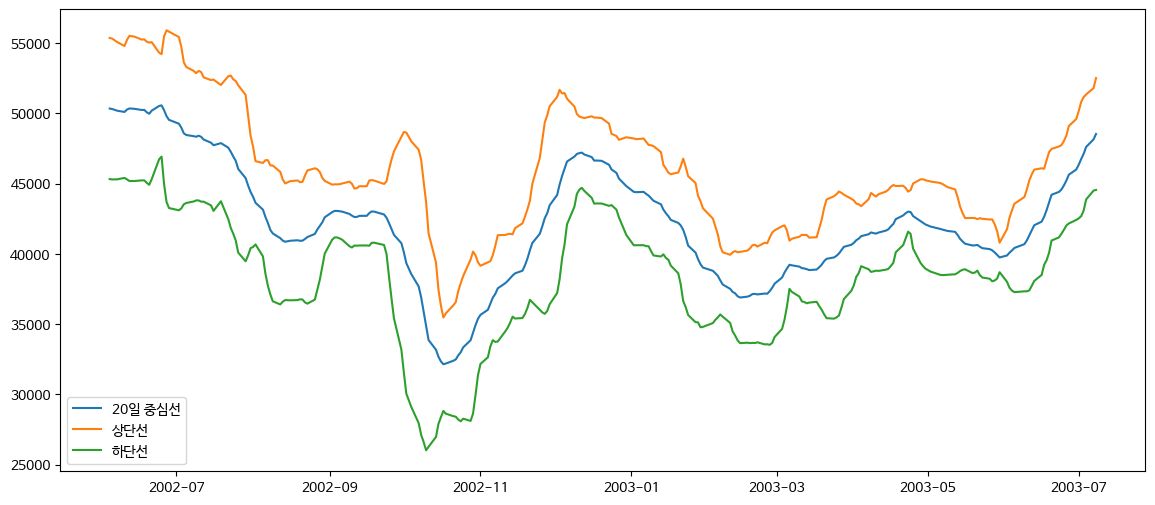

In [4]:
# Chart 작성

import matplotlib.pyplot as plt
plt.figure(figsize = (14,6))

plt.plot(df_stock_close['20일중심선'][30:300], label='20일 중심선')
plt.plot(df_stock_close['상단선'][30:300], label='상단선')
plt.plot(df_stock_close['하단선'][30:300], label='하단선')

plt.legend()
plt.show()